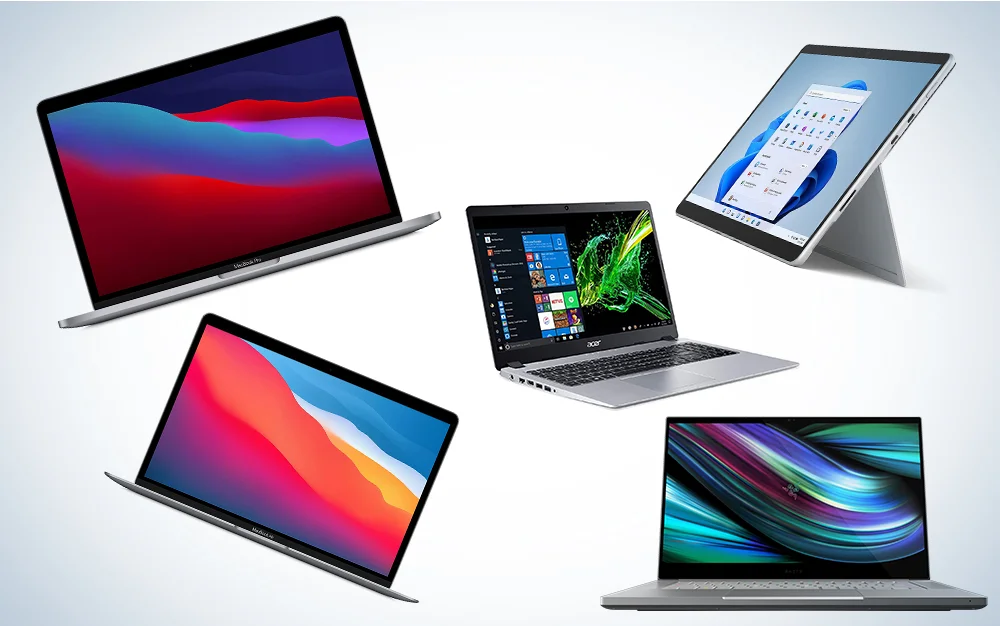

In [846]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#model building libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import VotingRegressor

In [847]:
df=pd.read_csv("/content/drive/MyDrive/laptop_price.csv",encoding='Latin-1')

In [848]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [849]:
df.shape

(1303, 13)

In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [851]:
df['Price']=df['Price_euros']*90.42

In [852]:
df.drop('Price_euros',inplace=True,axis=1)

In [853]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121134.7698


* **laptop_ID**: A unique identifier for each laptop in the dataset.

* **Company**: The manufacturer or brand of the laptop.

* **Product**: The specific model or name of the laptop product.

* **TypeName**: The general category or type of the laptop (e.g., Ultrabook, Notebook, Gaming, etc.).

* **Inches**: The size of the laptop screen in inches.

* **ScreenResolution**: The resolution of the laptop screen, including details about the panel type (e.g., IPS Panel, Touchscreen) and resolution (e.g., Full HD 1920x1080).

* **Cpu**: The Central Processing Unit (CPU) of the laptop, including details about the processor's brand and speed.

* **Ram**: The amount of Random Access Memory (RAM) in gigabytes (GB) available in the laptop.

* **Memory**: The storage capacity of the laptop, typically specifying the type and size of storage (e.g., SSD, HDD) and any combination.

* **Gpu**: The Graphics Processing Unit (GPU) of the laptop, including details about the graphics card.

* **OpSys**: The operating system installed on the laptop (e.g., Windows, macOS, Linux).

* **Weight**: The weight of the laptop in kilograms (kg).

* **Price**: The price of the laptop in Rupees.

In [854]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [855]:
df.duplicated().sum()

0

In [856]:
df['Ram']=df['Ram'].str.replace('GB',' ')
df['Ram']=df['Ram'].astype('int32')

In [857]:
df['Weight']=df['Weight'].str.replace('kg',' ')
df['Weight']=df['Weight'].astype('float32')

In [858]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698


In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


**Exploratory Data Analysis**

* **UNIVARIATE ANALYSIS**

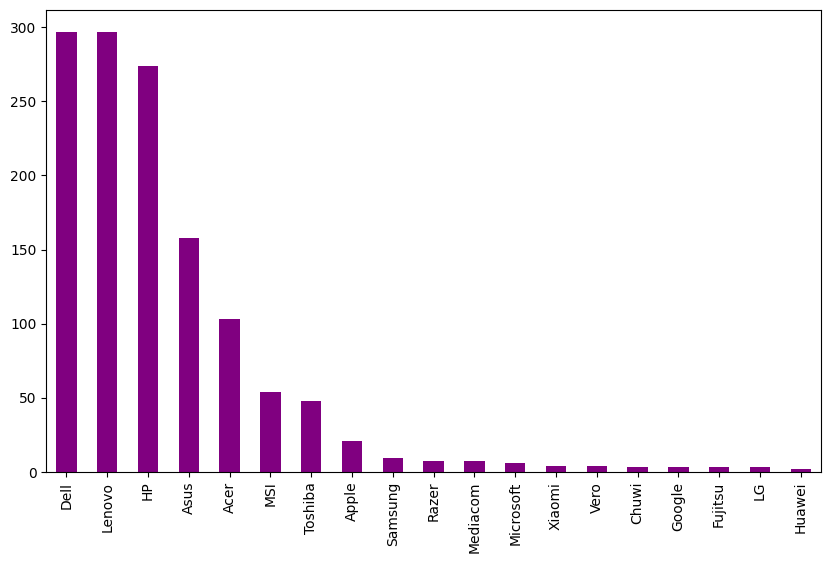

In [860]:
plt.figure(figsize=(10, 6))
df['Company'].value_counts().plot(kind='bar',color='purple')
plt.show()

* Dell and Lenovo have almost the same number of laptops.

In [861]:
df['Product'].value_counts()

XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: Product, Length: 618, dtype: int64

<Figure size 1000x600 with 0 Axes>

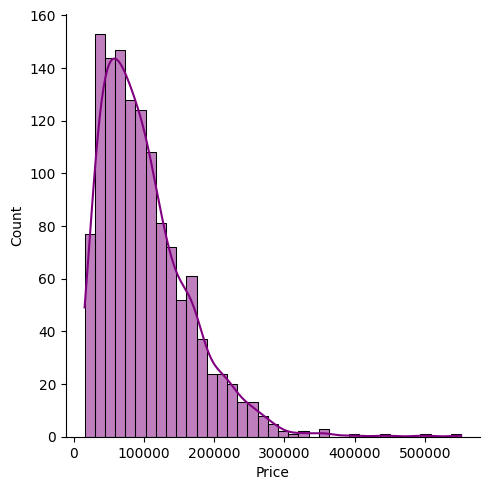

In [862]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Price', kde=True,color='purple')
plt.show()

* Right Skewed
* laptop prices indicates that there are many laptops with lower prices and only a few laptops with higher prices.

<Axes: >

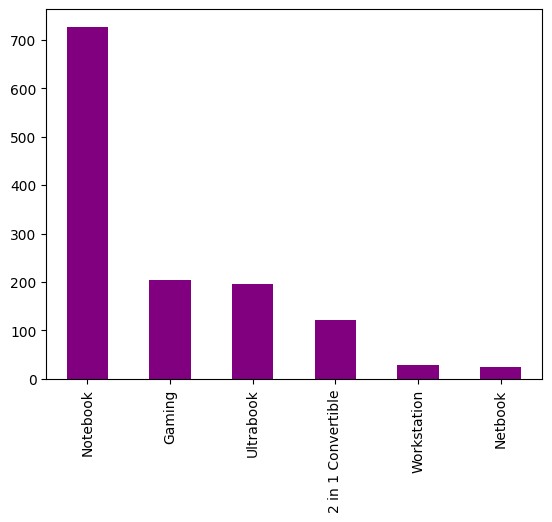

In [863]:
df['TypeName'].value_counts().plot(kind='bar',color='Purple')

<Figure size 1000x600 with 0 Axes>

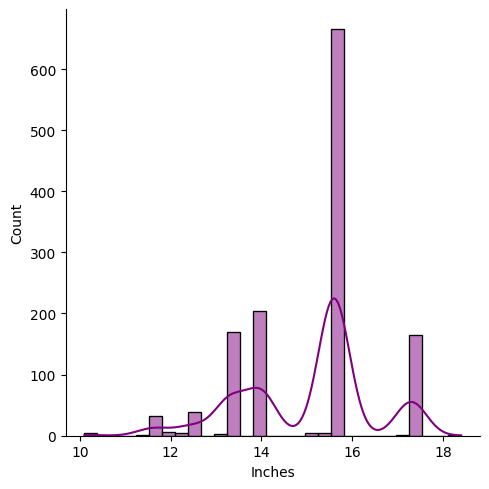

In [864]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Inches', kde=True,color='purple')
plt.show()

*  It can be observed that the most common screen size for laptops is 15.6 inches.

**2.Featrure Engneering**

**2.1 Feature Engineering on Screen Resolution Column**

In [865]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

* The 'ScreenResolution' column contains various details about the screen resolution, panel type, and touchscreen capabilities.
* Therefore creating new features based on the 'ScreenResolution' column can be beneficial, as it can help extract more meaningful information and patterns from the data

In [866]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)').squeeze()

In [867]:
df['Panel'] = df['ScreenResolution'].apply(lambda x: 'IPS Panel' if 'IPS Panel' in x else 'Non-IPS Panel')

In [868]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else 'Non-Touchscreen')

In [869]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Panel,Touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,2560x1600,IPS Panel,Non-Touchscreen


In [870]:
new=df['Resolution'].str.split("x",n=1,expand=True)

In [871]:
df['x_Resolution']=new[0]
df['y_Resolution']=new[1]

In [872]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Panel,Touchscreen,x_Resolution,y_Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,2560x1600,IPS Panel,Non-Touchscreen,2560,1600


In [873]:
df.drop('ScreenResolution',axis=1,inplace=True)
df.drop('Resolution',axis=1,inplace=True)

In [874]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Panel,Touchscreen,x_Resolution,y_Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,2560,1600


In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop_ID     1303 non-null   int64  
 1   Company       1303 non-null   object 
 2   Product       1303 non-null   object 
 3   TypeName      1303 non-null   object 
 4   Inches        1303 non-null   float64
 5   Cpu           1303 non-null   object 
 6   Ram           1303 non-null   int32  
 7   Memory        1303 non-null   object 
 8   Gpu           1303 non-null   object 
 9   OpSys         1303 non-null   object 
 10  Weight        1303 non-null   float32
 11  Price         1303 non-null   float64
 12  Panel         1303 non-null   object 
 13  Touchscreen   1303 non-null   object 
 14  x_Resolution  1303 non-null   object 
 15  y_Resolution  1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(1), object(11)
memory usage: 152.8+ KB


In [876]:
df['x_Resolution']=df['x_Resolution'].astype('int')
df['y_Resolution']=df['y_Resolution'].astype('int')

In [877]:
df.corr()['Price']

<ipython-input-877-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


laptop_ID       0.067830
Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
x_Resolution    0.556529
y_Resolution    0.552809
Name: Price, dtype: float64

* Clarity, often represented by factors like display resolution and pixels per inch (PPI), plays an essential role in determining the price of laptops.
*  creating a new column to represent pixels per inch (PPI) by combining the resolution (width and height) and screen size (in inches) can indeed provide valuable insights into the pixel density of the laptop screens.
*  Pixels per inch is a measure of how many pixels are packed into one inch of the display, which impacts the sharpness and clarity of the content.
* PPI = √((Width^2 + Height^2) / (Diagonal^2))

In [878]:
df['PixelsPerInch'] = ((df['x_Resolution'] ** 2 + df['y_Resolution'] ** 2) ** 0.5 / df['Inches']).astype('float')

In [879]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Panel,Touchscreen,x_Resolution,y_Resolution,PixelsPerInch
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,2560,1600,226.983005


In [880]:
df.corr()['Price']

<ipython-input-880-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


laptop_ID        0.067830
Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
x_Resolution     0.556529
y_Resolution     0.552809
PixelsPerInch    0.473487
Name: Price, dtype: float64

In [881]:
df.drop('x_Resolution',axis=1,inplace=True)
df.drop('y_Resolution',axis=1,inplace=True)
df.drop('Product',axis=1,inplace=True)
df.drop('laptop_ID',axis=1,inplace=True)

In [882]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81282.1548,Non-IPS Panel,Non-Touchscreen,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51991.5000,Non-IPS Panel,Non-Touchscreen,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,229436.2290,IPS Panel,Non-Touchscreen,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,163081.5120,IPS Panel,Non-Touchscreen,226.983005


<Axes: >

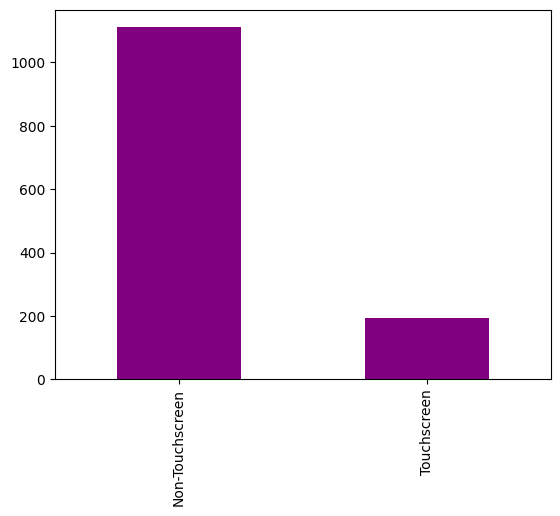

In [883]:
df['Touchscreen'].value_counts().plot(kind='bar',color='Purple')

* Touchscreen laptops are less

<Axes: >

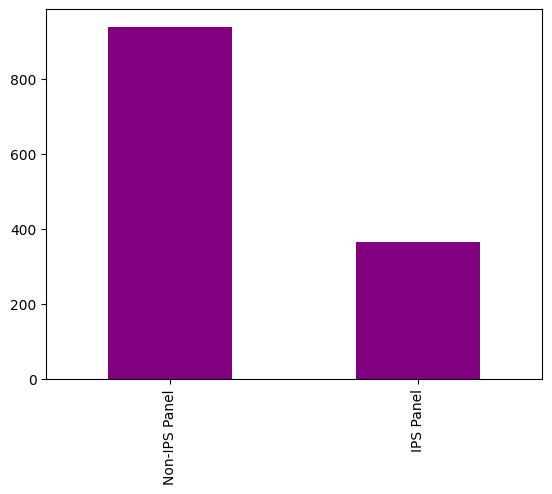

In [884]:
df['Panel'].value_counts().plot(kind='bar',color='Purple')

**2.2 Freature engineering on Cpu column**  

In [885]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [886]:
df['Cpu Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [887]:
def processor(pro):
  if pro=='Intel Core i5' or pro=='Intel Core i7' or pro=='Intel Core i3':
    return pro
  else:
      if pro.split()[0]=='Intel':
        return 'Intel Processor'
      else:
          return 'AMD Processor'

In [888]:
df['cpu']=df['Cpu Name'].apply(processor)

In [889]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,Cpu Name,cpu
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5


<Axes: >

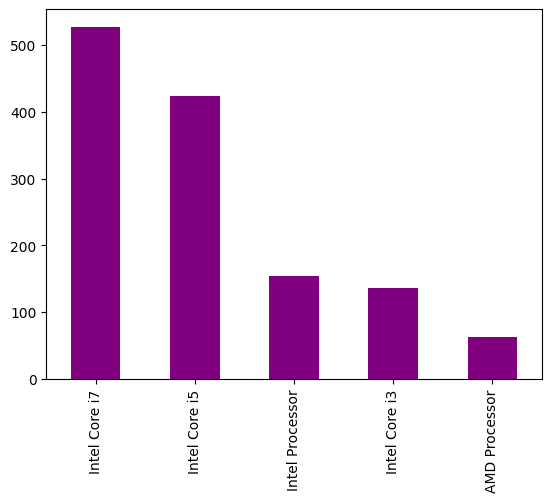

In [890]:
df['cpu'].value_counts().plot(kind='bar',color='Purple')

<Axes: >

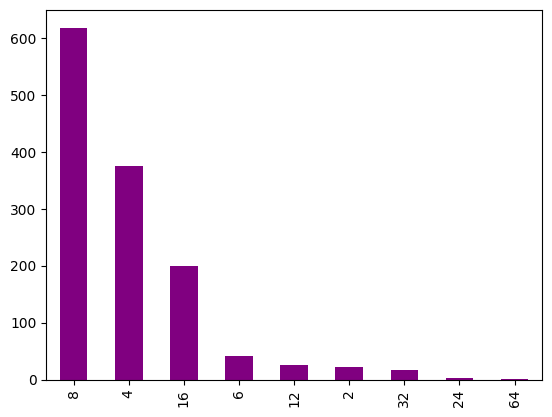

In [891]:
df['Ram'].value_counts().plot(kind='bar',color='Purple')

**2.3 Freature engineering on Memory column**

In [892]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [893]:
df["Memory"] = df["Memory"].str.replace('GB', '')

In [894]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [895]:
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [896]:
new = df["Memory"].str.split("+", n=1, expand=True)
df["first"] = new[0].str.strip()
df["second"] = new[1].str.strip()


In [897]:
new.sample()

,0,1
63,256 SSD,None


In [898]:
df["1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [899]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Touchscreen,PixelsPerInch,Cpu Name,cpu,first,second,1HDD,1SSD,1Hybrid,1Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,...,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,81282.1548,...,Non-Touchscreen,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,51991.5000,...,Non-Touchscreen,141.211998,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,229436.2290,...,Non-Touchscreen,220.534624,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,163081.5120,...,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,57687.9600,...,Touchscreen,157.350512,Intel Core i7,Intel Core i7,128 SSD,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,135539.5800,...,Touchscreen,276.053530,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,20706.1800,...,Non-Touchscreen,111.935204,Intel Celeron Dual,Intel Processor,64 Flash Storage,None,0,0,0,1
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,69080.8800,...,Non-Touchscreen,100.454670,Intel Core i7,Intel Core i7,1000 HDD,None,1,0,0,0


In [900]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

<ipython-input-900-873bb58bfddd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [901]:
df["2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [902]:
df['second'] = df['second'].str.replace(r'\D', '')

<ipython-input-902-7103acb542b6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [903]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [904]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,first,second,1HDD,1SSD,1Hybrid,1Flash_Storage,2HDD,2SSD,2Hybrid,2Flash_Storage
983,Fujitsu,Notebook,15.6,Intel Core i5 6200U 2.3GHz,4,256 SSD,Intel HD Graphics 520,Windows 10,2.30,58682.58,...,256,0,0,1,0,0,0,0,0,0
1275,Asus,Ultrabook,13.3,Intel Core M 6Y30 0.9GHz,8,512 SSD,Intel HD Graphics 515,Windows 10,1.20,65916.18,...,512,0,0,1,0,0,0,0,0,0
1133,HP,Ultrabook,15.6,Intel Core i7 7500U 2.7GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.84,67995.84,...,256,0,0,1,0,0,0,0,0,0
966,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,1.90,74596.50,...,500,0,1,0,0,0,0,0,0,0
1095,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72245.58,...,256,1000,0,1,0,0,1,0,0,0
775,Asus,2 in 1 Convertible,15.6,Intel Core i7 7500U 2.7GHz,12,2000 HDD,Nvidia GeForce 940MX,Windows 10,2.30,75862.38,...,2000,0,1,0,0,0,0,0,0,0
1148,HP,Notebook,15.6,Intel Core i5 6200U 2.3GHz,8,256 SSD,Intel HD Graphics 520,Windows 7,1.88,142773.18,...,256,0,0,1,0,0,0,0,0,0
837,Toshiba,Notebook,15.6,Intel Core i3 7100U 2.4GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,2.00,60490.98,...,500,0,1,0,0,0,0,0,0,0
930,Lenovo,Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.20,27939.78,...,1000,0,1,0,0,0,0,0,0,0
485,Lenovo,Notebook,14.0,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.75,94850.58,...,256,0,0,1,0,0,0,0,0,0


In [905]:
df["HDD"] = (df["first"] * df["1HDD"] + df["second"] * df["2HDD"])
df["SSD"] = (df["first"] * df["1SSD"] + df["second"] * df["2SSD"])
df["Hybrid"] = (df["first"] * df["1Hybrid"] + df["second"] * df["2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["1Flash_Storage"] + df["second"] * df["2Flash_Storage"])

In [906]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,1Hybrid,1Flash_Storage,2HDD,2SSD,2Hybrid,2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,81282.1548,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,51991.5000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,229436.2290,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,163081.5120,...,0,0,0,0,0,0,0,256,0,0


In [907]:
df.drop(columns=['first', 'second', '1HDD', '1SSD', '1Hybrid',
       '1Flash_Storage', '2HDD', '2SSD', '2Hybrid',
       '2Flash_Storage','Memory'],inplace=True)

In [908]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,Cpu Name,cpu,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,0,128,0,0


In [909]:
df.corr()['Price']

<ipython-input-909-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
PixelsPerInch    0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

* Highly correlated to SSD
* Hybrid and Flash storage are negatively correlated

In [910]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

**2.4 Freature engineering on Gpu column**

In [911]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [912]:
df['gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

In [913]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,Cpu Name,cpu,HDD,SSD,gpu
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,81282.1548,Non-IPS Panel,Non-Touchscreen,127.677940,Intel Core i5,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,51991.5000,Non-IPS Panel,Non-Touchscreen,141.211998,Intel Core i5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,229436.2290,IPS Panel,Non-Touchscreen,220.534624,Intel Core i7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,163081.5120,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,0,256,Intel


In [914]:
df['gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu, dtype: int64

In [915]:
df=df[df['gpu']!='ARM']

In [916]:
df['gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu, dtype: int64

In [917]:
df.drop(columns=['Gpu'],inplace=True)

<ipython-input-917-6552775d328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [918]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,Cpu Name,cpu,HDD,SSD,gpu
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,0,128,Intel


**2.5 Freature engineering on OpSys column**

In [919]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [920]:
def opps(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other'

In [921]:
df['os'] = df['OpSys'].apply(opps)

<ipython-input-921-ebe05f9519a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(opps)


In [922]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,Cpu Name,cpu,HDD,SSD,gpu,os
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac


<Figure size 1000x600 with 0 Axes>

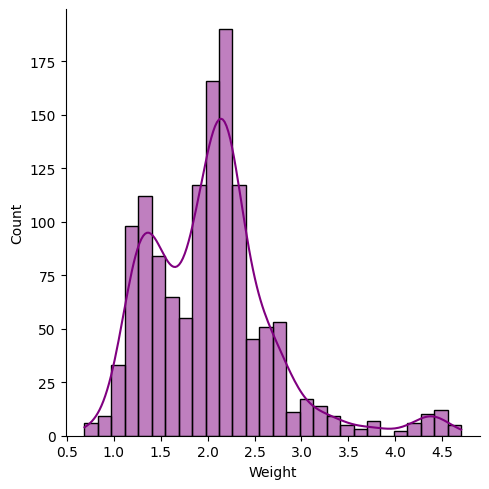

In [923]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Weight', kde=True,color='purple')
plt.show()

**Bivariate Analysis**

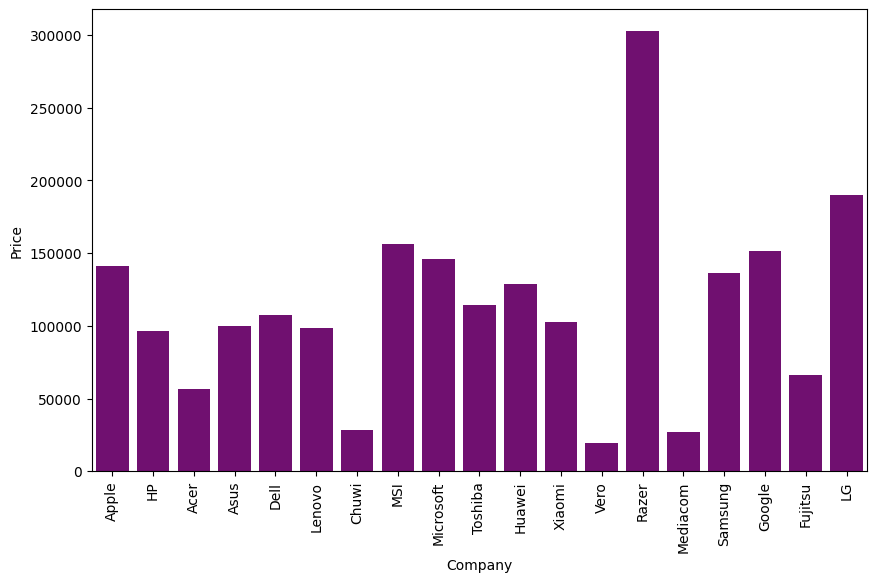

In [924]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Company'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

* The bar plot visually represents the variation in laptop prices among different brands. It is evident that laptop prices vary significantly depending on the Company, with Razer being the most expensive and HP and Dell and others  being more budget-friendly options.

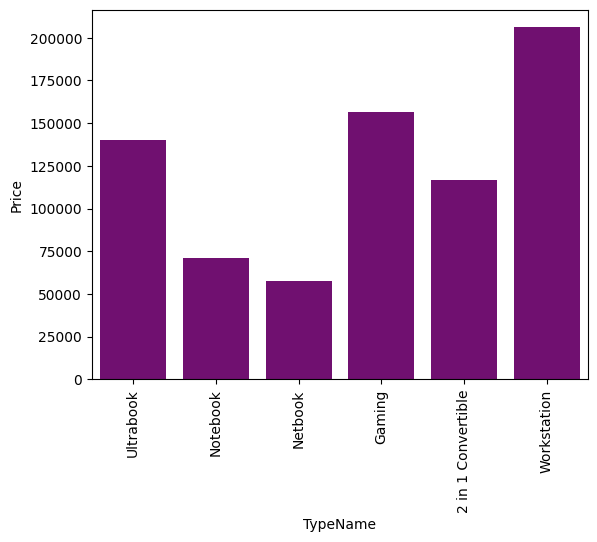

In [925]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['TypeName'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

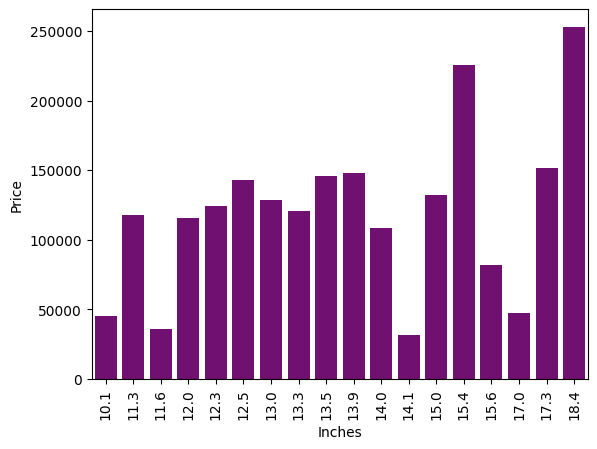

In [926]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['Inches'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

*  we can observe a positive relationship between the size of laptops and their prices. As the size of laptops increases, the prices also tend to increase.
* Not a strong corr but very slightly

In [927]:
df.drop('Inches',axis=1,inplace=True)

<ipython-input-927-754cad18620d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Inches',axis=1,inplace=True)


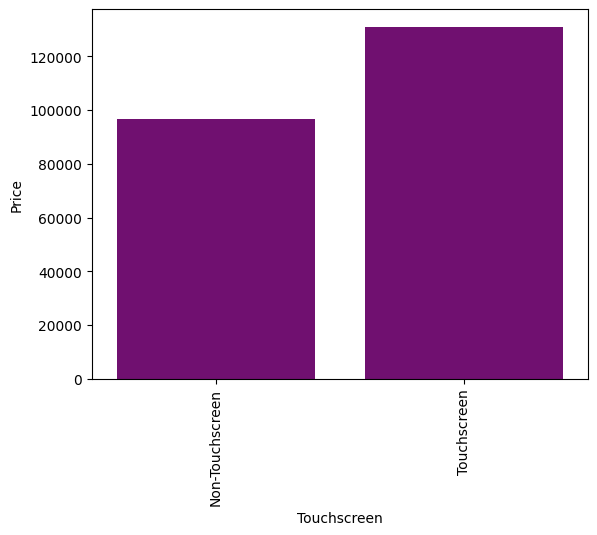

In [928]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['Touchscreen'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

* Touchscreen laptops are costly

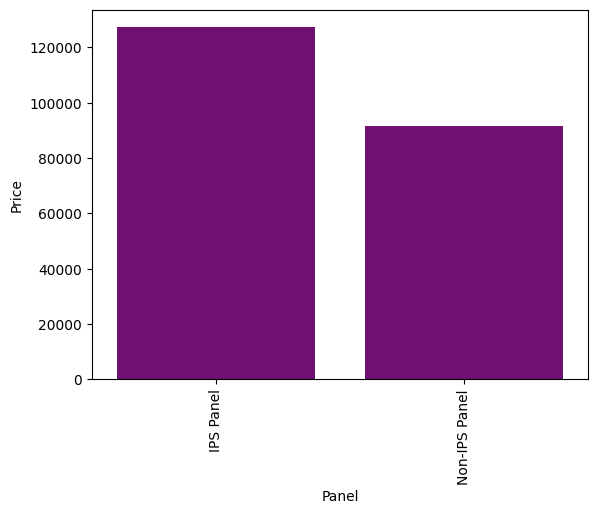

In [929]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['Panel'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

* Laptops with IPS panels are more costly

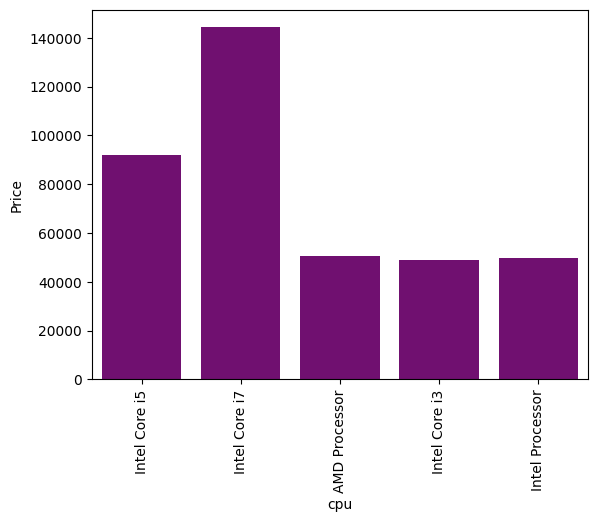

In [930]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['cpu'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

* The price of i7 and i5 processor is more

In [931]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<ipython-input-931-4564745628a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu','Cpu Name'],inplace=True)


In [932]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Panel,Touchscreen,PixelsPerInch,cpu,HDD,SSD,gpu,os
0,Apple,Ultrabook,8,macOS,1.37,121134.7698,IPS Panel,Non-Touchscreen,226.983005,Intel Core i5,0,128,Intel,Mac


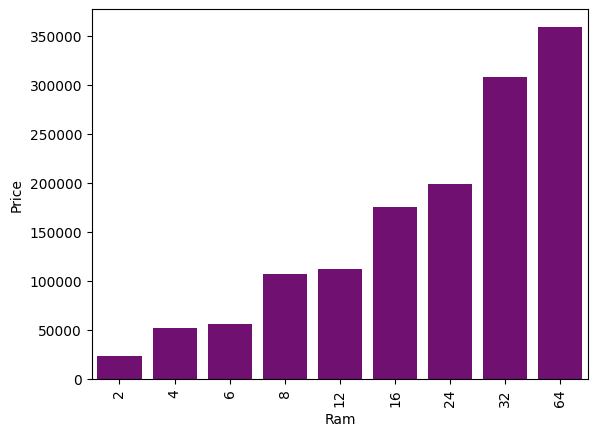

In [933]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['Ram'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

* As RAM (Random Access Memory) increases, the price of laptops also tends to increase

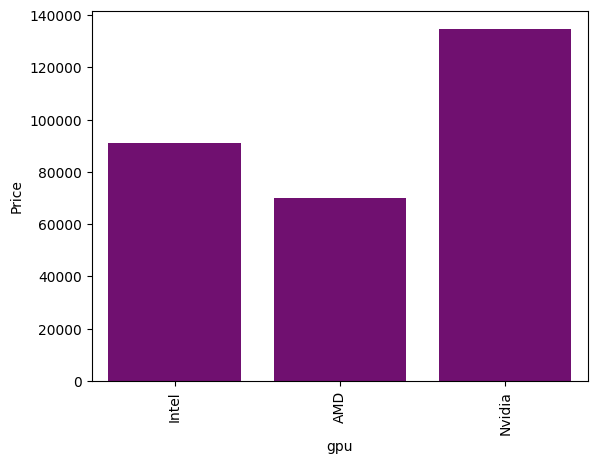

In [934]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['gpu'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

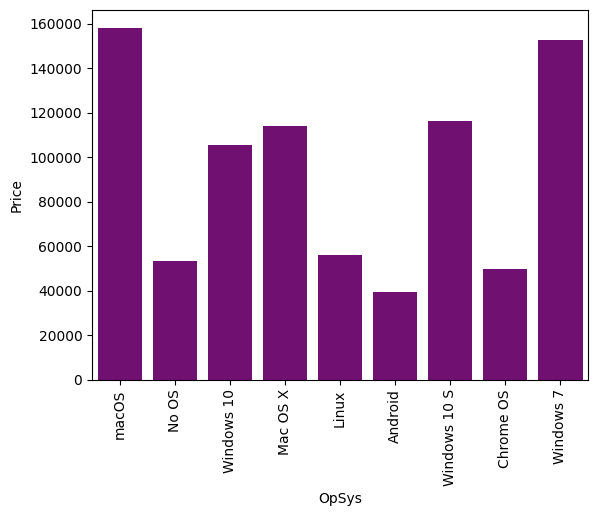

In [935]:
#plt.figure(figsize=(10, 6))
sns.barplot(x=df['OpSys'],y=df['Price'],color='Purple',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()

In [936]:
df.drop(columns=['OpSys'],inplace=True)

<ipython-input-936-b4b9708ecded>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


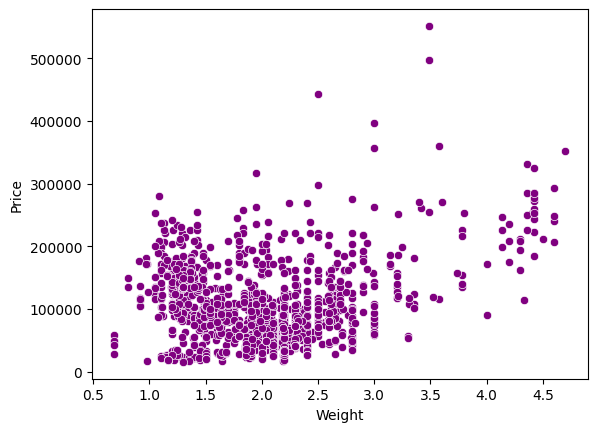

In [937]:
sns.scatterplot(x=df['Weight'],y=df['Price'],color='Purple')
plt.show()

<ipython-input-938-0e9a78b44820>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap=plt.cm.BuPu_r,  fmt='.2f')


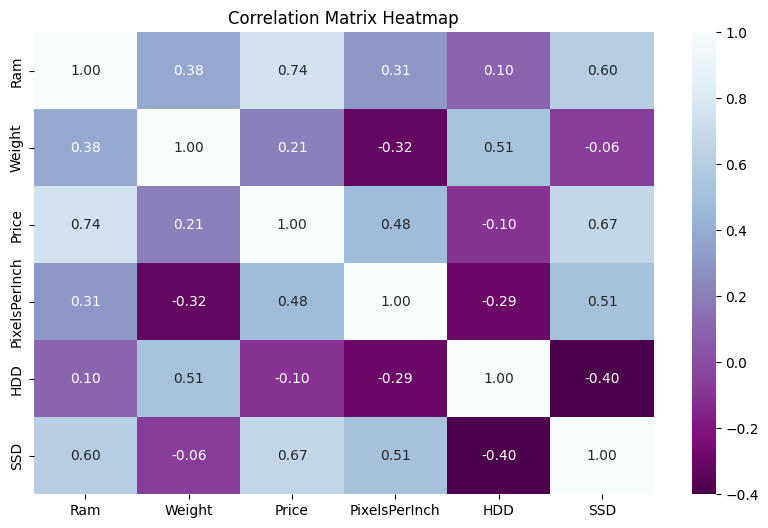

In [938]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.BuPu_r,  fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

* As we have seen the target column is skewed

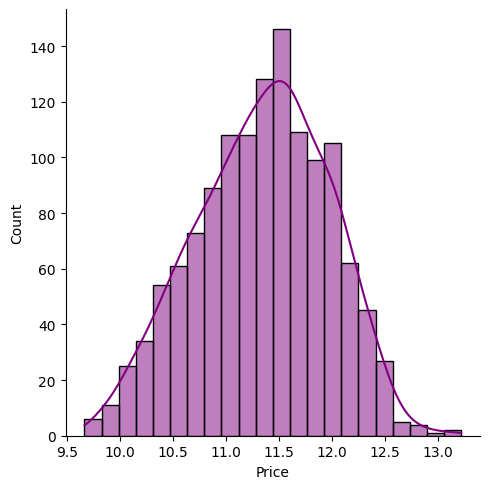

In [939]:
#plt.figure(figsize=(10, 6))
sns.displot(np.log(df['Price']), kde=True,color='purple')
plt.show()

**HANDLING CATEGORICAL FEATURES**

In [940]:
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Panel', 'Touchscreen', 'cpu', 'gpu', 'os'], drop_first=True)

In [941]:
X = df_encoded.drop(columns=['Price'])

In [942]:
X.head(1)

,Ram,Weight,PixelsPerInch,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Panel_Non-IPS Panel,Touchscreen_Touchscreen,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel Processor,gpu_Intel,gpu_Nvidia,os_Other,os_Windows
0,8,1.37,226.983005,0,128,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [943]:
X.columns

Index(['Ram', 'Weight', 'PixelsPerInch', 'HDD', 'SSD', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Panel_Non-IPS Panel',
       'Touchscreen_Touchscreen', 'cpu_Intel Core i3', 'cpu_Intel Core i5',
       'cpu_Intel Core i7', 'cpu_Intel Processor', 'gpu_Intel', 'gpu_Nvidia',
       'os_Other', 'os_Windows'],
      dtype='object')

In [944]:
y = np.log(df['Price'])
y.head(1)

0    11.704659
Name: Price, dtype: float64

**FEATURE SCALING**

**Train Test Split**

In [945]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

**MODEL BUILDING**

**1.Linear regression**

In [946]:
model1= LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error : {mae:.4f}")

R-squared Score: 0.8002
Mean Absolute Error : 0.2045


**2.RIDGE REGRESSION**

In [947]:
model2= Ridge(alpha=10)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.8025
Mean Absolute Error (MAE): 0.2038


**LASOO REGRESSION**

In [948]:
model3= Lasso(alpha=0.001)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.7980
Mean Absolute Error (MAE): 0.2060


**KNN**

In [949]:
model4= KNeighborsRegressor(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.7887
Mean Absolute Error (MAE): 0.1965


**DECISION TREE**

In [950]:
model5= DecisionTreeRegressor(max_depth=8)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.8114
Mean Absolute Error (MAE): 0.1933


**RANDOM FOREST**

In [951]:
model6= RandomForestRegressor(n_estimators=100, random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.8685
Mean Absolute Error (MAE): 0.1642


**SVM**

In [952]:
model7= SVR(kernel='rbf',C=10000,epsilon=0.1)
model7.fit(X_train, y_train)
y_pred= model7.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.7737
Mean Absolute Error (MAE): 0.2043


**ADA BOOST**

In [953]:
model8= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
model8.fit(X_train, y_train)
y_pred = model8.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.7920
Mean Absolute Error (MAE): 0.2166


**GRADIENT BOOST**

In [954]:
model9= GradientBoostingRegressor(n_estimators=500, random_state=3)
model9.fit(X_train, y_train)
y_pred = model9.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.8636
Mean Absolute Error (MAE): 0.1637


**XG BOOST**

In [955]:
model10= XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
model10.fit(X_train, y_train)
y_pred = model10.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R2) Score: 0.8610
Mean Absolute Error (MAE): 0.1635


**HYPERPARAMETER TUNNING**

* 1.Random Forest

In [956]:
param_grid_rf = {
    'n_estimators': [100, 200,800,950],
    'max_depth': [None, 10, 20,35],
    'max_features': ['sqrt', 'log2', 0.5]  # Adjust max_features as needed
}

grid_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=3),
                       param_grid=param_grid_rf,
                       scoring='neg_mean_absolute_error',
                       cv=3, verbose=2)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Model:", best_rf)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=800; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, n_estimators=800; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=800; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=950; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=950; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, n_e

* XG BOOST

In [957]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_xgb = GridSearchCV(estimator=XGBRegressor(random_state=3),
                        param_grid=param_grid_xgb,
                        scoring='neg_mean_absolute_error',
                        cv=3, verbose=2)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("Best XGB Model:", best_xgb)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_e

* Gradient Boost

In [958]:
param_grid_gb = {
    'n_estimators': [500, 800, 900],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=3),
                       param_grid=param_grid_gb,
                       scoring='neg_mean_absolute_error',
                       cv=3, verbose=2)

grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
print("Best GBt Model:", best_gb)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=800; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=900; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=900; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=900; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_es

**Model evalutaion**

In [959]:
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

y_pred_xgb = best_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

y_pred_gb = best_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("=" * 55)
print("              Random Forest")
print("="*55)
print(f"Random Forest: R-squared = {r2_rf:.4f}, MAE = {mae_rf:.4f}")
print("             XGBoost")
print("="*55)
print(f"XGBoost: R-squared = {r2_xgb:.4f}, MAE = {mae_xgb:.4f}")
print("             Gradient Boosting")
print("="*55)
print(f"Gradient Boosting: R-squared = {r2_gb:.4f}, MAE = {mae_gb:.4f}")
print("=" * 55)

              Random Forest
Random Forest: R-squared = 0.8826, MAE = 0.1508
             XGBoost
XGBoost: R-squared = 0.8727, MAE = 0.1605
             Gradient Boosting
Gradient Boosting: R-squared = 0.8563, MAE = 0.1587


**Voting Regressor**

In [960]:
random_forest = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gradient_boosting = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgboost = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)

In [961]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting),
    ('xgboost', xgboost)
])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)

In [962]:
r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
print("Voting Regressor:")
print(f"R-squared = {r2_voting:.4f}, MAE = {mae_voting:.4f}")

Voting Regressor:
R-squared = 0.8735, MAE = 0.1625


**Random Forest model is giving the highest score (R-squared score of 88.26)**